In [1]:
# Source:
# https://www.youtube.com/watch?v=65kl4eE9ovI&ab_channel=Mr.PSolver

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import animation
from matplotlib.animation import PillowWriter
import scienceplots
plt.style.use(['science','notebook'])
from itertools import combinations

In [3]:
X_COORD = 0
Y_COORD = 1

In [4]:
n_particles = 16
radius = 0.06

r = np.random.random((2, n_particles)) # Generates a 2 x n_particles array, values between 0..1

#  boolean indexing, works as a filter
ixr = r[X_COORD] > 0.5
ixl = r[X_COORD] <= 0.5

In [5]:
ids = np.arange(n_particles)

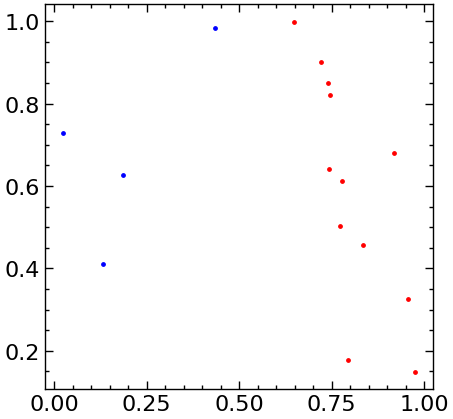

In [6]:
plt.figure(figsize=(5,5))
plt.scatter(r[X_COORD][ixl],r[Y_COORD][ixl], color='b', s=6)
plt.scatter(r[X_COORD][ixr],r[Y_COORD][ixr], color='r', s=6)


(array([1., 2., 0., 0., 1., 0., 1., 6., 2., 3.]),
 array([0.02362611, 0.11885584, 0.21408558, 0.30931531, 0.40454505,
        0.49977478, 0.59500452, 0.69023425, 0.78546399, 0.88069372,
        0.97592346]),
 <BarContainer object of 10 artists>)

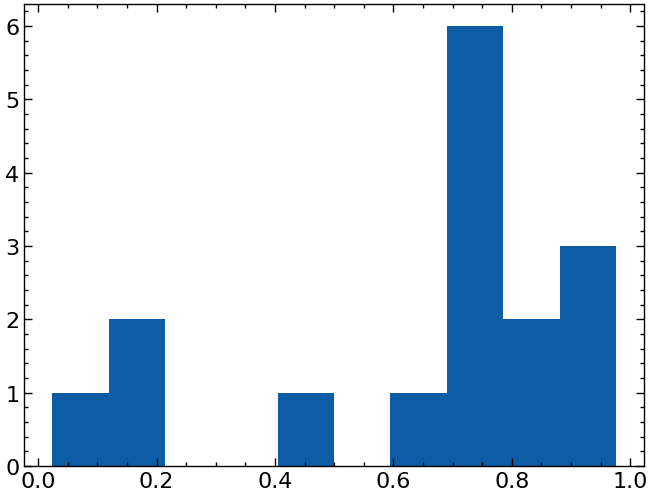

In [7]:
plt.hist(r[0])

In [8]:
v = np.zeros((2, n_particles))

In [9]:
# Initial velocities
v[X_COORD][ixr] = -500
v[Y_COORD][ixl] = 500

In [10]:
# get cartesian pairs with all particles x all particles
ids_pairs = np.asarray(list(combinations(ids,2))) # <- keeps track of ALL particles pairs

In [11]:
# ids_pairs

In [12]:
x_pairs = np.asarray(list(combinations(r[X_COORD],2))) # <- r is the coordinates array, so x_pairs are the x positions of all particles
y_pairs = np.asarray(list(combinations(r[Y_COORD],2))) # <- same, but for y.

In [13]:
dx_pairs = np.diff(x_pairs, axis=1).ravel()
dy_pairs = np.diff(x_pairs, axis=1).ravel()
d_pairs = np.sqrt(dx_pairs**2 + dx_pairs**2) # Distance between every two particles

In [14]:
ids_pairs_collide = ids_pairs[d_pairs < 2 * radius]

In [15]:
ids_pairs_collide

array([[ 0,  4],
       [ 0,  5],
       [ 0,  6],
       [ 0,  7],
       [ 0, 10],
       [ 0, 15],
       [ 1,  3],
       [ 2, 12],
       [ 2, 13],
       [ 4,  5],
       [ 4,  6],
       [ 4,  7],
       [ 4, 10],
       [ 4, 15],
       [ 5,  6],
       [ 5,  7],
       [ 5, 10],
       [ 5, 11],
       [ 5, 15],
       [ 6,  7],
       [ 6, 10],
       [ 6, 11],
       [ 6, 15],
       [ 7, 10],
       [ 7, 11],
       [ 7, 15],
       [10, 14],
       [10, 15],
       [11, 12],
       [12, 13]])

In the line of code v1 = v[:, ids_pairs_collide[:,0]], there are a few key components to understand:

v[:, ids_pairs_collide[:,0]]:

v: This is likely a NumPy array.
:: This colon means "select all rows" in the array v.
ids_pairs_collide[:,0]: This part is selecting the first column (index 0) from the ids_pairs_collide array.
Array Indexing:

ids_pairs_collide[:,0]: This selects all rows from the first column of the ids_pairs_collide array. If ids_pairs_collide is a 2D array, this will return a 1D array containing the elements from the first column.
v[:, ids_pairs_collide[:,0]]: This uses the 1D array obtained from ids_pairs_collide[:,0] to index the columns of v. Essentially, it selects all rows from v and specific columns as indicated by the values in ids_pairs_collide[:,0].
To summarize, v1 will be a new array that contains all rows from v but only the columns specified by the first column of ids_pairs_collide.

In [16]:
v1 = v[:, ids_pairs_collide[:,0]] # all x's from v in ids_pairs_collide
v2 = v[:, ids_pairs_collide[:,1]] # all y's from v in ids_pairs_collide
r1 = r[:, ids_pairs_collide[:,0]]
r2 = r[:, ids_pairs_collide[:,1]]


In [17]:
# ids_pairs_collide

In [18]:
ids_pairs_collide[:,1]

array([ 4,  5,  6,  7, 10, 15,  3, 12, 13,  5,  6,  7, 10, 15,  6,  7, 10,
       11, 15,  7, 10, 11, 15, 10, 11, 15, 14, 15, 12, 13])

In [19]:
# .T = matrix transposal
#  @ = matrix multiplication

def get_new_v(_v1, _v2, _r1, _r2):
    return _v1 - np.diag((_v1-_v2).T@(_r1-_r2))/np.sum((_r1-_r2)**2, axis=0) * (_r1-_r2)

# _v1new = v1 - np.diag((v1-v2).T@(r1-r2))/np.sum((r1-r2)**2, axis=0) * (r1-r2)
# _v2new = v1 - np.diag((v2-v1).T@(r2-r1))/np.sum((r2-r1)**2, axis=0) * (r2-r1)


In [20]:

v1new = get_new_v(v1, v2, r1, r2)
v2new = get_new_v(v2, v1, r2, r1)

In [21]:
v2new

array([[-500., -500., -500., -500., -500., -500.,    0., -500., -500.,
        -500., -500., -500., -500., -500., -500., -500., -500., -500.,
        -500., -500., -500., -500., -500., -500., -500., -500., -500.,
        -500., -500., -500.],
       [   0.,    0.,    0.,    0.,    0.,    0.,  500.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.]])

In [22]:
def get_delta_pairs(x):
    return np.diff(np.asarray(list(combinations(x, 2))), axis=1).ravel()

def get_deltad_pairs(x):
    return np.sqrt(get_delta_pairs(r[X_COORD]**2 + get_delta_pairs(r[Y_COORD]**2))

# Continue from Part 3
